In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df=pd.read_csv('laptops.csv')
df

,title,price,rating
0,"HP 15s, AMD Ryzen 3 5300U, 15.6 inch(39.6cm) F...","39,990",NaN
1,"Dell Vostro 3420 Laptop,12th Gen Intel Core i3...","41,990",NaN
2,"Honor MagicBook 14, AMD Ryzen 5 5500U 14-inch ...","44,490",4.4 out of 5 stars
3,HP 255 G8 Laptop with AMD Athlon Silver 3050U ...,"26,999",NaN
4,Lenovo IdeaPad Slim 3 Intel Core i3-1115G4 11t...,"33,639",NaN
...,...,...,...
334,"Dell Inspiron 3525 Laptop, AMD Ryzen R3-5425U,...","39,990",NaN
335,(Renewed) DELL Latitude 5490 Core i5 8th Gen L...,"26,615",NaN
336,"ASUS Vivobook S 14 Flip (2023), AMD Ryzen 5 75...","68,990",NaN
337,Xiaomi NoteBook Pro 120 12th Gen Intel i5-1245...,"64,999",NaN


In [4]:
df.head()

,title,price,rating
0,"HP 15s, AMD Ryzen 3 5300U, 15.6 inch(39.6cm) F...","39,990",NaN
1,"Dell Vostro 3420 Laptop,12th Gen Intel Core i3...","41,990",NaN
2,"Honor MagicBook 14, AMD Ryzen 5 5500U 14-inch ...","44,490",4.4 out of 5 stars
3,HP 255 G8 Laptop with AMD Athlon Silver 3050U ...,"26,999",NaN
4,Lenovo IdeaPad Slim 3 Intel Core i3-1115G4 11t...,"33,639",NaN


In [5]:
df.info

<bound method DataFrame.info of                                                  title   price   
0    HP 15s, AMD Ryzen 3 5300U, 15.6 inch(39.6cm) F...  39,990  \
1    Dell Vostro 3420 Laptop,12th Gen Intel Core i3...  41,990   
2    Honor MagicBook 14, AMD Ryzen 5 5500U 14-inch ...  44,490   
3    HP 255 G8 Laptop with AMD Athlon Silver 3050U ...  26,999   
4    Lenovo IdeaPad Slim 3 Intel Core i3-1115G4 11t...  33,639   
..                                                 ...     ...   
334  Dell Inspiron 3525 Laptop, AMD Ryzen R3-5425U,...  39,990   
335  (Renewed) DELL Latitude 5490 Core i5 8th Gen L...  26,615   
336  ASUS Vivobook S 14 Flip (2023), AMD Ryzen 5 75...  68,990   
337  Xiaomi NoteBook Pro 120 12th Gen Intel i5-1245...  64,999   
338  ASUS Vivobook 14, Intel Core i7-1165G7 11th Ge...  56,990   

                 rating  
0                   NaN  
1                   NaN  
2    4.4 out of 5 stars  
3                   NaN  
4                   NaN  
..                 

In [6]:
print(df.columns.tolist())

['title', 'price', 'rating']


In [7]:
def clean_price_column(price):
    if isinstance(price,str):
        price=price.replace(',','')
        price=price.strip()
        if price.isnumeric():
            price =int(price)
            return price
        if len(price)==0:
            return np.nan
    return price

    

In [8]:
clean_price_column('1,999')

1999

In [9]:
df['cleaned_price']=df['price'].apply(clean_price_column)

In [10]:
def clean_rating_column(rating):
    if isinstance(rating,str):
        rating=rating.split()[0]
        return float(rating)
    return rating


In [11]:
df['cleaned_rating']=df['rating'].apply(clean_rating_column)

In [12]:
df.sort_values(by='price',ascending=False,inplace=True)

In [13]:
df.drop(columns=['price','rating'],inplace=True)

In [14]:
df

,title,cleaned_price,cleaned_rating
129,"ASUS TUF Gaming A15, 15.6"" (39.62 cm) FHD 144H...",98000.0,4.3
104,"ASUS TUF Gaming A15, 15.6"" (39.62 cm) FHD 144H...",98000.0,4.3
160,"ASUS TUF Gaming A15, 15.6"" (39.62 cm) FHD 144H...",98000.0,4.3
179,Samsung Galaxy Book2 360 Intel 12th Gen i7 Evo...,97990.0,4.3
79,"ASUS ROG Strix G17, 17.3-inch (43.94 cms) FHD ...",90990.0,4.5
...,...,...,...
191,(renewed) Latitude D620 core 2 Duo Laptop/4 gb...,NaN,NaN
239,Lenovo IdeaPad Slim 3 Intel Core i3 11th Gen 1...,NaN,NaN
276,(Renewed) Lenovo IdeaPad 3 11th Gen Intel Core...,NaN,NaN
301,"Dell Inspiron 3525 Laptop, AMD Athlon Silver 3...",NaN,NaN


<Axes: >

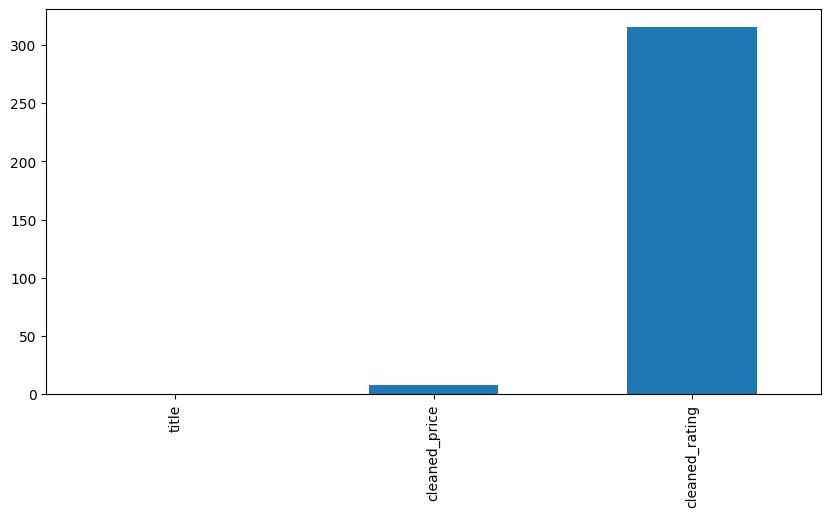

In [17]:
df.isnull().sum().plot(kind='bar',figsize=(10,5))
